# Kaggle Intro to Deep Learning Tutorial

In [57]:
import matplotlib.pyplot as plt
import numpy as np
# setting matplotlib style defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

## A Single Neuron 

In [2]:
# .csv downloaded from Kaggle
red_wine = pd.read_csv('archive/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape # determine number of columns to use for features

(1599, 12)

In [4]:
# input shape is your number of features. in this case my target is quality, with 11 features.
input_shape = [red_wine.shape[1]-1]

In [5]:
# create a linear learning model. unit is the number of outputs, and input shape is features
model = keras.Sequential([layers.Dense(units=1, input_shape=input_shape)])

In [6]:
model

In [7]:
# feature weights
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.22510481],
       [-0.45554134],
       [ 0.54978436],
       [ 0.6610517 ],
       [ 0.00134075],
       [-0.25477162],
       [-0.66844666],
       [-0.39734498],
       [ 0.44946474],
       [ 0.2490865 ],
       [-0.45275307]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


> These weights are first selected randomly. This is a very simple model right now, but eventually a deep learning model would begin to change weights with every iteration to help with prediction.

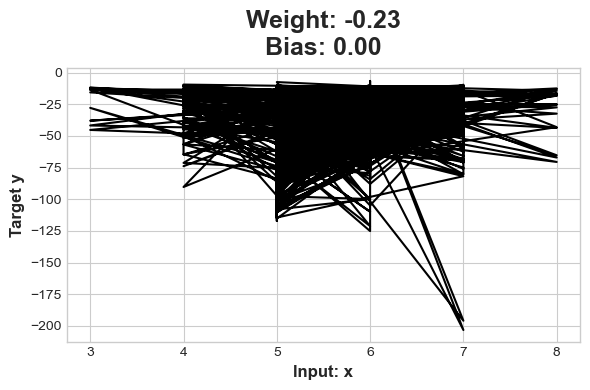

In [8]:
# Here's an attempt to graph the weights of the prediction and actual, but it didnt exactly turn out well
x = red_wine['quality']
y = model.predict(red_wine.drop(columns = 'quality'))

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

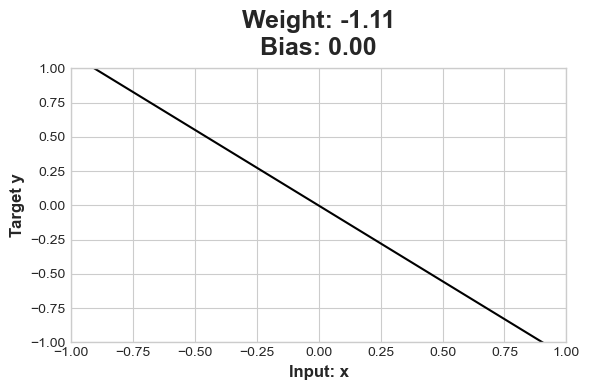

In [9]:
# This one shows hohw weights change the regression line in a simple linear deep learning model
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## Deep Neural Networks

In [10]:
concrete = pd.read_csv('archive/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
concrete.shape

(1030, 9)

### 1. Calculate input shape. ```CompressiveStrength``` is the target variable.

In [12]:
input_shape = [concrete.shape[1]-1]

### 2. Define a Model with Hidden Layers. Each one has 512 units, one output with no activation. Input shape as an argument to the first layer. 


In [13]:
model = keras.Sequential([
    #hidden layers
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    #output layer
    layers.Dense(1)
])

### 3. Activation Layers. Refactor activation argument as its own layer

In [14]:
model = keras.Sequential([
    # inital layer
    layers.Dense(512, input_shape=[8]),
    #activation layer
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    #output layer
    layers.Dense(1),
])

### Try with something other than -relu

In [15]:
def viz_activation(activation = 'relu'):
    activation_layer = layers.Activation(activation)
    x = tf.linspace(-3.0, 3.0, 100)
    y = activation_layer(x) # once created, a layer is callable just like a function
    plt.figure(dpi=100)
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.xlabel("Input")
    plt.ylabel("Output")
    return plt.show()

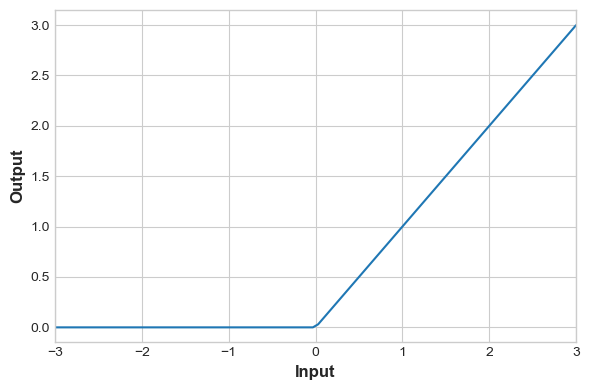

In [16]:
viz_activation()

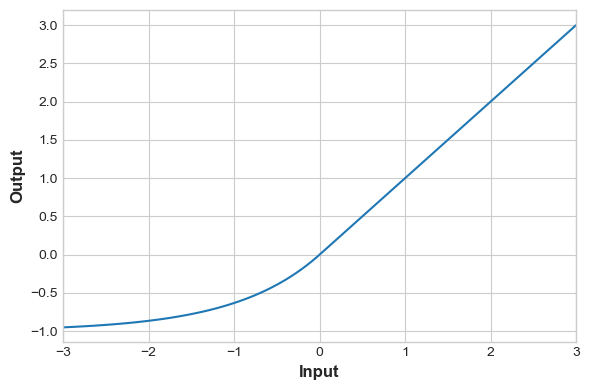

In [17]:
viz_activation('elu')

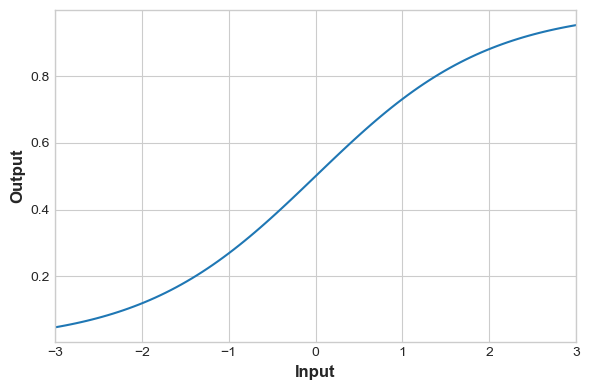

In [18]:
viz_activation('sigmoid')

## Stochastic Gradient Descent

Stochastic Gradient Descent is how deep learning models are trained. It uses a loss function and an optimizer to find the weights that best fit the dataset

In [19]:
fuel = pd.read_csv('archive/fuel.csv')

In [20]:
X = fuel.copy()

In [21]:
y = fuel.pop('FE')

In [22]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

In [23]:
X = preprocessor.fit_transform(X)
y = np.asarray(np.log(y))

In [24]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [51]


In [25]:
fuel.head()

,EngDispl,NumCyl,Transmission,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [26]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.913643,1.068005,-0.892196,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,-1.213812,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,-1.054952,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,-1.289106,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,-1.321809,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

### 1. Add Loss and Optimizer
use adam optimizer and mean average error loss

In [28]:
model.compile(optimizer="adam",loss="mae")

### 2. Train Model
Train the network for 200 epochs with a batch size of 128. The input data is `X` with target `y`.

In [29]:
history = model.fit(
    X,  y,
    batch_size=128,
    epochs= 200,
)

Train on 1107 samples
Epoch 1/200
1107/1107 [==============================] - 1s 563us/sample - loss: 2.8676
Epoch 2/200
1107/1107 [==============================] - 0s 46us/sample - loss: 1.0986
Epoch 3/200
1107/1107 [==============================] - 0s 46us/sample - loss: 0.6097
Epoch 4/200
1107/1107 [==============================] - 0s 45us/sample - loss: 0.3693
Epoch 5/200
1107/1107 [==============================] - 0s 44us/sample - loss: 0.2628
Epoch 6/200
1107/1107 [==============================] - 0s 44us/sample - loss: 0.1933
Epoch 7/200
1107/1107 [==============================] - 0s 45us/sample - loss: 0.1495
Epoch 8/200
1107/1107 [==============================] - 0s 45us/sample - loss: 0.1263
Epoch 9/200
1107/1107 [==============================] - 0s 44us/sample - loss: 0.1039
Epoch 10/200
1107/1107 [==============================] - 0s 45us/sample - loss: 0.0849
Epoch 11/200
1107/1107 [==============================] - 0s 49us/sample - loss: 0.0719
Epoch 12/200
1107/

### 3. Evaluate the training
try to look for the epoch where you stop seeing an appreciable decrease in loss rates

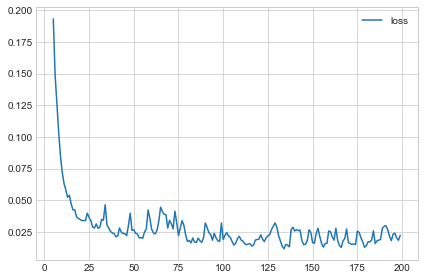

In [30]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [31]:
history_df[history_df['loss'] == 0.011942958418875528]

,loss


## Overfitting and Underfitting

Load the spotify dataset to predict the popularity of the song based on various features like ```tempo```,```danceablility```, and ```mode```

In [32]:
spotify = pd.read_csv('archive/spotify.csv')

### Make a shallow and narrow model

In [33]:
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_album_id            32828 non-null  object 
 4   track_album_name          32828 non-null  object 
 5   track_album_release_date  32828 non-null  object 
 6   playlist_name             32828 non-null  object 
 7   playlist_id               32828 non-null  object 
 8   playlist_genre            32828 non-null  object 
 9   playlist_subgenre         32828 non-null  object 
 10  danceability              32828 non-null  float64
 11  energy                    32828 non-null  float64
 12  key                       32828 non-null  int64  
 13  loudness                  32828 non-null  float64
 14  mode  

In [35]:
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

In [36]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

In [37]:
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

In [38]:
X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

In [39]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = np.asarray(y_train / 100) # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = np.asarray(y_valid / 100)

In [40]:
input_shape = [X_train.shape[1]]

In [41]:
print(f'Input Shape : {input_shape[0]}')

Input Shape : 18


In [42]:
model = keras.Sequential([layers.Dense(1, input_shape = input_shape)])

In [43]:
model.compile(optimizer = 'adam',loss ='mae')

In [44]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),
                    batch_size = 512, epochs = 50, verbose = 0)

Minimum Validation Loss: 0.1948


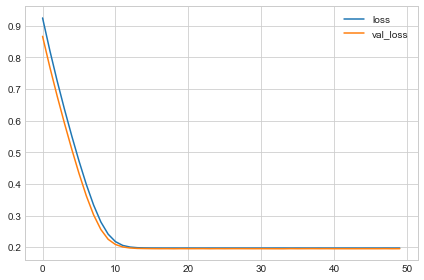

In [45]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print('Minimum Validation Loss: {:0.4f}'.format(history_df['val_loss'].min()))

- The curves are relatively close, but the value loss never increases. This indicates that the model is underfit

### Now make it deeper and wider

Train on 24940 samples, validate on 7888 samples
Epoch 1/50
24940/24940 [==============================] - 1s 33us/sample - loss: 0.2478 - val_loss: 0.2046
Epoch 2/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.2029 - val_loss: 0.1981
Epoch 3/50
24940/24940 [==============================] - 0s 14us/sample - loss: 0.1972 - val_loss: 0.1958
Epoch 4/50
24940/24940 [==============================] - 0s 12us/sample - loss: 0.1943 - val_loss: 0.1955
Epoch 5/50
24940/24940 [==============================] - 0s 12us/sample - loss: 0.1918 - val_loss: 0.1941
Epoch 6/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1904 - val_loss: 0.1940
Epoch 7/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1888 - val_loss: 0.1935
Epoch 8/50
24940/24940 [==============================] - 0s 12us/sample - loss: 0.1874 - val_loss: 0.1930
Epoch 9/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1869 - val_l

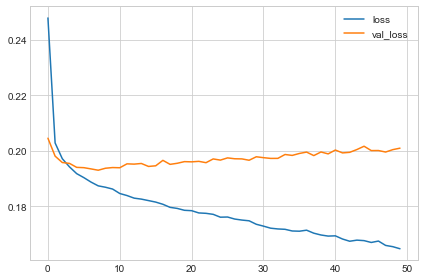

In [46]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

- in this case, the value loss for the train model continues to decrease, but the validate value loss actually begins to increase. This indicates that the model is overfit

### Now define an early stopping callback that waits for 5 epochs and needs a validation loss of .001

In [47]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Train on 24940 samples, validate on 7888 samples
Epoch 1/50
24940/24940 [==============================] - 1s 29us/sample - loss: 0.2496 - val_loss: 0.2067
Epoch 2/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.2023 - val_loss: 0.2003
Epoch 3/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1970 - val_loss: 0.1981
Epoch 4/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1944 - val_loss: 0.1983
Epoch 5/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1925 - val_loss: 0.1961
Epoch 6/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1907 - val_loss: 0.1959
Epoch 7/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1893 - val_loss: 0.1946
Epoch 8/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1881 - val_loss: 0.1954
Epoch 9/50
24940/24940 [==============================] - 0s 13us/sample - loss: 0.1872 - val_l

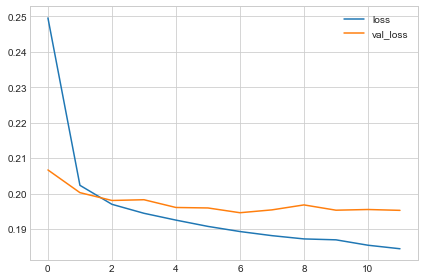

In [48]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

The model had an improvement minimum validation loss of .012 compared to the first model 

## Dropout and Batch Normalization

### 1. Add Dropout to the Spotify Model above

In [49]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(rate = .3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate = .3),
    layers.Dense(1)
])

Minimum Validation Loss: 0.1898


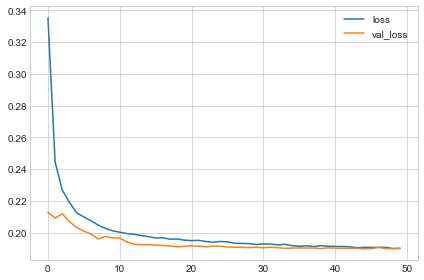

In [50]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [51]:
concrete = pd.read_csv('archive/concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

Minimum Validation Loss: nan


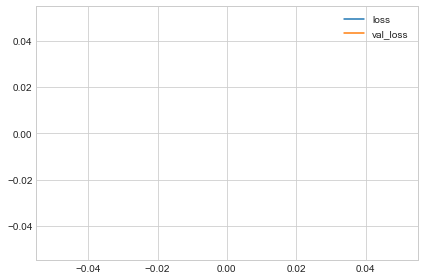

In [52]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    np.asarray(X_train), np.asarray(y_train),
    validation_data=(np.asarray(X_valid), np.asarray(y_valid)),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [53]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),    
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Minimum Validation Loss: 3.9942


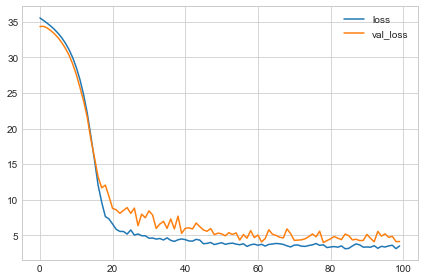

In [54]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    np.asarray(X_train), np.asarray(y_train),
    validation_data=(np.asarray(X_valid), np.asarray(y_valid)),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Minimum Validation Loss: 6.0559


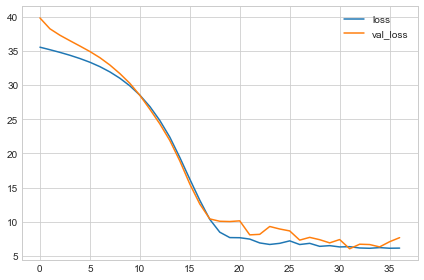

In [55]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate = .3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate = .3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate = .3),
    layers.BatchNormalization(),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    np.asarray(X_train), np.asarray(y_train),
    validation_data=(np.asarray(X_valid), np.asarray(y_valid)),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## Binary Classification

In [58]:
hotel = pd.read_csv('archive/hotel.csv')

In [62]:
X = hotel.copy()
y = X.pop('is_canceled')

In [63]:
X['arrival_date_month'] = X['arrival_date_month'].map({'January': 1, 'February': 2, 'March' : 3,
                                                       'April':4, 'May':5, 'June':6, 'July':7,
                                                       'August':8, 'September':9, 'October':10,
                                                       'November':11, 'December':12})

In [64]:
features_num = ["lead_time", "arrival_date_week_number",
                "arrival_date_day_of_month", "stays_in_weekend_nights",
                "stays_in_week_nights", "adults", "children", "babies",
                "is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled", "required_car_parking_spaces",
                "total_of_special_requests", "adr"]

In [65]:
features_cat = ["hotel", "arrival_date_month", "meal",
                "market_segment", "distribution_channel",
                "reserved_room_type", "deposit_type", "customer_type"]

In [67]:
transformer_num = make_pipeline(SimpleImputer(strategy = 'constant'), StandardScaler())

In [68]:
transformer_cat = make_pipeline(SimpleImputer(strategy = 'constant', fill_value = 'NA'), OneHotEncoder(handle_unknown = 'ignore'))

In [69]:
preprocessor = make_column_transformer((transformer_num, features_num),(transformer_cat, features_cat))

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

In [72]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [73]:
input_shape = [X_train.shape[1]]

### 1. Define the Model

In [74]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = .3),
    
    layers.Dense(4, activation='relu'),  
    layers.BatchNormalization(),
    layers.Dropout(rate = .3),
    
    layers.Dense(1, activation='sigmoid'),
])

### 2. Add optimizer, loss, and metric

In [75]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Train on 89542 samples, validate on 29848 samples
Epoch 1/200
89542/89542 [==============================] - 5s 54us/sample - loss: 0.5204 - binary_accuracy: 0.7359 - val_loss: 0.4479 - val_binary_accuracy: 0.8008
Epoch 2/200
89542/89542 [==============================] - 3s 38us/sample - loss: 0.4502 - binary_accuracy: 0.7942 - val_loss: 0.4101 - val_binary_accuracy: 0.8110
Epoch 3/200
89542/89542 [==============================] - 3s 38us/sample - loss: 0.4373 - binary_accuracy: 0.7999 - val_loss: 0.4010 - val_binary_accuracy: 0.8150
Epoch 4/200
89542/89542 [==============================] - 3s 38us/sample - loss: 0.4285 - binary_accuracy: 0.8034 - val_loss: 0.3943 - val_binary_accuracy: 0.8184
Epoch 5/200
89542/89542 [==============================] - 3s 37us/sample - loss: 0.4231 - binary_accuracy: 0.8071 - val_loss: 0.3924 - val_binary_accuracy: 0.8212
Epoch 6/200
89542/89542 [==============================] - 3s 37us/sample - loss: 0.4185 - binary_accuracy: 0.8090 - val_loss: 0.3

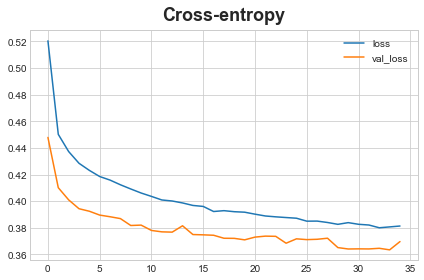

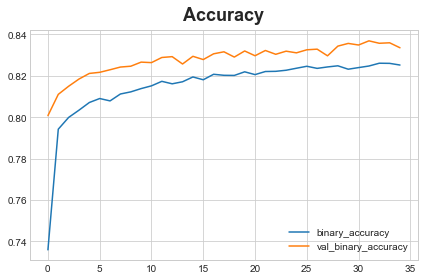

In [77]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    np.asarray(X_train), np.asarray(y_train),
    validation_data=(np.asarray(X_valid), np.asarray(y_valid)),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")